<a href="https://colab.research.google.com/github/doxenix/WUM/blob/main/s24216_WUM_lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science z Python 3.10. Topologia sieci neuronowych
## 🇬🇧 Data Science with Python 3.10. Topology of a Neural Network
#### 👨‍🏫 PhD, M.Sc. Psych., M.Sc. IT, Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek

In [1]:
!pip install mnist

import numpy as np
import math
import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

# zaimportujemy biblioteki, które pozwolą nam na pracę podczas tego ćwiczenia
# musimy doinstalować tylko jedną z nich (mnist), która zawiera materiał treningowy oraz testowy

### 2. Funkcje aktywacji

W trakcie wykładu omawiane były funkcje aktywacji. Funkcje te cechują się różnymi właściwościami, które sprawiają, że mogą być one przydatne w zadaniach klasyfikacji do jednej z dwóch klas lub do ich większej ilości (np. softmax). Zanim zaczniemy nasze podstawowe zadanie napisz pozostałe funkcje aktywacji, korzystając z podanego szablonu.

Na tym etapie tworzymy nowe zmienne, które będą odnosiły się do wartości wyjściowych pewnej sieci neuronowej.

In [2]:
x = np.array([1.3, 0.32, 0.21]) # wyjścia dla softmax
y = 2 # wyjście dla sigmoid
a = -9 # wyjście dla relu
z = 4 # wyjście dla tangensa hiperbolicznego

Stworzymy teraz prostą implementację funkcji softmax przyjmującą x.

In [3]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))
print(softmax(x))

[0.58427337 0.21928428 0.19644234]



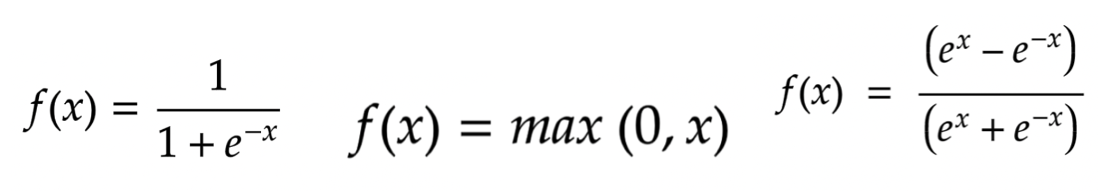

In [4]:
def sigmoid(y):
  return 1 / (1 + np.exp(1)**-y)
print(sigmoid(y))

0.8807970779778823


In [5]:
def relu(a):
  return a if a > 0 else 0
print(relu(a))

0


In [6]:
def tanh(z):
    return (np.exp(1)** z - np.exp(1)**-z) / (np.exp(1)** z + np.exp(1)**-z)
print(tanh(z))

0.9993292997390669


### 3. Tworzenie sieci neuronowej

#### 3.1. Przygotowanie danych treningowych i testowych

Zacznim przejdziemy do trenowania sieci neuronowej musimy najpierw rozwiązać kilka problemów. Pierwszym z nich jest stworzenie odpowiednich zmiennych odnoszących się do danych treningowych oraz danych testowych.

In [7]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

Zanim przejdziemy dalej możemy podejrzeć nasze dane. Zastanówmy się do czego odnoszą się liczby 60000 oraz 28?

In [12]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### 3.2. Normalizacja i "spłaszczenie" danych

Na tym etapie powinniśmy mieć stworzone cztery zmienne odnoszące się do materiału treningowego oraz etykiet (osobno dla zbioru treningowego i testowego). Zanim przejdziemy dalej musimy zadać jeszcze o normalizację. Co właściwie zamierzamy zrobić z naszymi danymi? Chcemy sprowadzić wartości pikseli z zakresu od 0-255 do nowego zakresu -0.5-0.5. Dlaczego to robimy?

In [8]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

Możemy jeszcze raz podejrzeć nasze dane, ale na tym etapie jeszcze nic się nie zmieniło.

In [14]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Teraz dokonujemy "spłaszczenia" (flatten) naszych danych. Skąd się bierze wartość 784? (to po prostu 28*28 = 784). Każdy obraz w danych treningowych MNIST ma wymiary 28 x 28 (oraz informację odnoszącą się do skali szarości). Spłaszczymy każdy obraz 28x28 do 784-wymiarowego wektora, którego użyjemy jako danych wejściowych do naszej sieci neuronowej.

In [9]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Teraz widzimy, że kształt naszych danych zmienił.

In [16]:
print(train_images.shape)

(60000, 784)


#### 3.3. Przygotowanie architektury sieci neuronowej

Mamy już przygotowane dane, dokonaliśmy ich normalizacji oraz przeprowadziliśmy "spłaszczenie". Przechodzimy w końcu do etapu tworzenia architektury naszej sieci neuronowej. Wykorzystamy w tym celu klasę Sequential. Mamy do wyboru teraz kilka możliwości, które zależą od danych, które chcemy analizować. 

*   Zważywszy na to, że chcemy przeprowadzić "prostą" klasyfikację danych MNIST (jeszcze bez wykorzystania CNN) stworzymy sieć neuronową, która będzie składała się z warstw gęstych (Dense), w których każdy neuron będzie połączony z innym neuronem. 
*   Musimy tylko ustalić liczbę nodes oraz odpowiednią funkcję aktywacji.
*   Wskazujemy również odpowiednią wartość wejściową (input_shape).
*   Ostatnia wartość nodes odnosi się do ilości klas, ale jak ustalić wartość nodes w poprzednich warstwach?


In [17]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

#### 3.4. Optymalizator, funkcja straty i metryki

W tym miejscu dokonujemy wyboru odpowiedniego optymalizatora, dobieramy funkcję straty oraz wskazujemy metryki, które wykorzystamy do oceny przydatności naszego modelu. Zagadnienia te zostaną poruszone na następnym wykładzie. 

In [18]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### 3.5. Trenowanie sieci neuronowej

W końcu przechodzimy do etapu trenowania przygotowanej przez nas architektury sieci neuronowej. Musimy jeszcze określić liczbę epok ("cykli trenowania sieci") oraz batch size. Pod koniec uzyskujemy informacje dotyczące straty walidacji oraz dokładności klasyfikacji.

In [19]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.2868 - accuracy: 0.9133
Epoch 2/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1378 - accuracy: 0.9569
Epoch 3/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1076 - accuracy: 0.9657
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0884 - accuracy: 0.9720
Epoch 5/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0745 - accuracy: 0.9766


#### 4. Zadania do wykonania

##### 4.1. Zadanie 1.
Poszukaj informacji dotyczącej możliwości wygenerowania grafiki prezentującej architekturę sieci neuronowej i wstaw ją poniżej (z użytym kodem). Wykorzystaj architekturę sieci wykorzystaną na zajęciach.
##### 4.2. Zadanie 2.
Załaduj ponownie model, dokonaj modyfikacji parametrów odnoszących się do procesu trenowania sieci neuronowej pokazywanej w czasie zajęć. Podnieś liczbę epok do 100. Po jakim czasie obserwujesz okres stabilizacji dokładności klasyfikacji lub spadku jej wartości? Jak zachowuje się wartość validation loss?
##### 4.3. Zadanie 3.
Załaduj ponownie model, dokonaj modyfikacji parametrów odnoszących się do procesu trenowania sieci neuronowej pokazywanej w czasie zajęć. Pozostaw liczbę epok, ale zmodyfikuj wartość batch size określając ją na 20. Czy wpłynęło to na parametry końcowe modelu, czy nie miało związku?
##### 4.4. Zadanie 4.
Zaproponuj inną architekturę sieci neuronowej. Zmień ilość warstw, zmodyfikuj ilość węzłów. Dodaj nowy typ warstwy Dropout (zob. więcej w tym miejscu - https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/). Czy udało Ci się osiągnąć lepsze parametry modelu?
##### 4.5. Zadanie 5.
Odtwórz dwie wyświetlone poniżej architektury sieci neuronowych (model_x) oraz (model_y). Określ funkcję aktywacji jako linear (również dla wyjścia sieci) i przeprowadź uczenie przy liczbie epok wynoszącej 10. Jak opisałbyś przebieg uczenia się? Dlaczego sieci neuronowe, pomimo ich zróżnicowania, zachowują się podobnie podczas trenowania i ich parametry (dokładność klasyfikacji, val loss) są takie same niezależnie od epoki?

In [ ]:
#zadanie1
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
#zadanie2
model_2 = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=30,
)

'''
Mozemy zauwazyc, ze model juz od samego poczatku bardzo szybko osiaga wysokie accuracy i mniej wiecej w 15 eopoce
accuracy wynosi juz 99%. Od tego momentu, w kolejnych epokach jej poziom, co prawda zwiększa się jednak jest to już
bardzo powolne. Wartość straty  również zachwouje się jak w przypadku pierwszego moelu.
'''


Epoch 1/100
2000/2000 [==============================] - 10s 5ms/step - loss: 0.2915 - accuracy: 0.9106
Epoch 2/100
2000/2000 [==============================] - 9s 5ms/step - loss: 0.1396 - accuracy: 0.9569
Epoch 3/100
2000/2000 [==============================] - 9s 4ms/step - loss: 0.1107 - accuracy: 0.9653
Epoch 4/100
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0883 - accuracy: 0.9723
Epoch 5/100
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0754 - accuracy: 0.9765
Epoch 6/100
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0661 - accuracy: 0.9786
Epoch 7/100
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0605 - accuracy: 0.9801
Epoch 8/100
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0526 - accuracy: 0.9830
Epoch 9/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0486 - accuracy: 0.9844
Epoch 10/100
2000/2000 [==============================] - 8s 4ms/step -

'\nMozemy zauwazyc, ze model juz od samego poczatku bardzo szybko osiaga wysokie accuracy 97. i mala strate, \npotem mniej wiecej od 30 epoki accuracy zaczna stawac w mijescu w granicach 99.4-99.7 i dalej idzie bardzo opornie, \nco moze swiadczyc o przeuczeniu sie modelu.\n'

In [21]:
model_3 = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_3.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

'''
Zmnijeszenie ilosci probek nie miala zadnego wplywu na nasz model
Starta i accuraccy jest na identycznym poziomie
'''

Epoch 1/5
3000/3000 [==============================] - 16s 5ms/step - loss: 0.2812 - accuracy: 0.9120
Epoch 2/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.1435 - accuracy: 0.9546
Epoch 3/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.1097 - accuracy: 0.9651
Epoch 4/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0909 - accuracy: 0.9718
Epoch 5/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0792 - accuracy: 0.9740


In [16]:
from keras.layers import Dropout

model_new = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  
  Dense(256, activation='relu'),
                      
  Dense(256, activation='relu'),
  
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dropout(0.1),
  Dense(10, activation='softmax'),
])

model_new.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_new.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)
'''
Dodanie nowych warst nie pomoga osiagnac lepszych parametrow modelu. 
Co wiecej, warstwa Droput ktora pomoga w nieprzeuczeniu modelu, powoduje, ze
model wolnej osiaga nizsza strate i wyzsze accuracy.
Z drugiej strony, niewykluczone, ze powyzszy model lepiej radzilby sobie na danych testowych
'''

Epoch 1/5
3000/3000 [==============================] - 21s 7ms/step - loss: 0.3340 - accuracy: 0.8979
Epoch 2/5
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1808 - accuracy: 0.9483
Epoch 3/5
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1407 - accuracy: 0.9589
Epoch 4/5
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1219 - accuracy: 0.9627
Epoch 5/5
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1063 - accuracy: 0.9685


In [19]:
#Zadanie5 (wnioski na samym dole)
model_x1 = Sequential([
  Dense(256, activation='linear', input_shape=(784,), name='dense_3'),                     
  Dense(256, activation='linear', name='dense_4'),  
  Dense(256, activation='linear', name='dense_5'),
  Dense(128, activation='linear', name='dense_6'),  
  Dense(128, activation='linear', name='dense_7'),
  Dense(128, activation='linear', name='dense_8'),  
  Dense(64, activation='linear', name='dense_9'),
  Dense(64, activation='linear', name='dense_10'),  
  Dense(64, activation='linear', name='dense_11'),  
  Dense(10, activation='linear', name='dense_12')  
], name='sequential_1')

model_x1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_x1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)


Epoch 1/5
3000/3000 [==============================] - 20s 7ms/step - loss: 7.5458 - accuracy: 0.0996
Epoch 2/5
3000/3000 [==============================] - 20s 7ms/step - loss: 8.1619 - accuracy: 0.0987
Epoch 3/5
3000/3000 [==============================] - 19s 6ms/step - loss: 8.1619 - accuracy: 0.0987
Epoch 4/5
3000/3000 [==============================] - 20s 7ms/step - loss: 8.1619 - accuracy: 0.0987
Epoch 5/5
3000/3000 [==============================] - 19s 6ms/step - loss: 8.1619 - accuracy: 0.0987


In [20]:
print(model_x1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)               

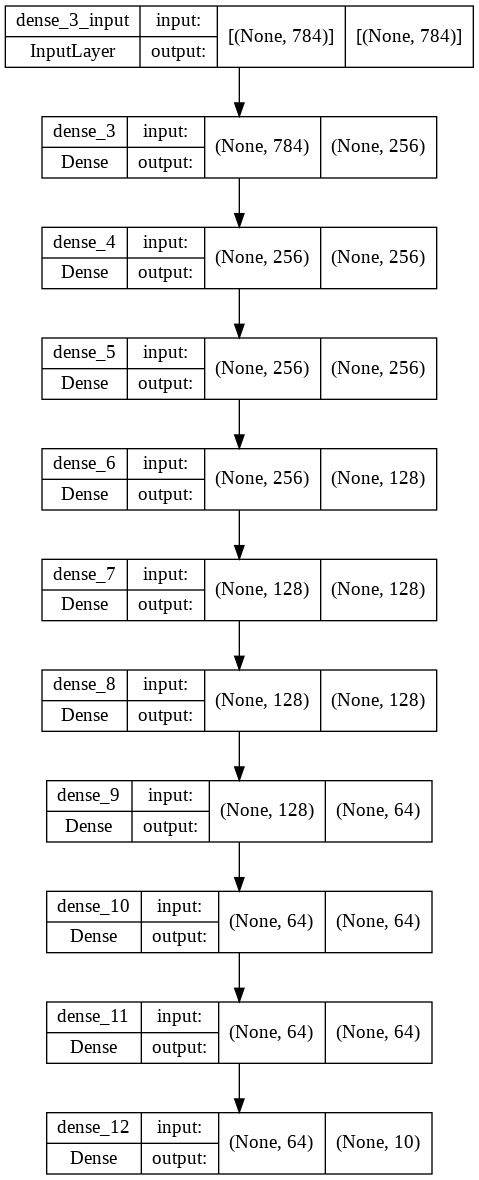

In [21]:
plot_model(model_x1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
model_y = Sequential([
  Dense(256, activation='linear', input_shape=(784,), name='dense_13'),                     
  Dense(128, activation='linear', name='dense_14'),  
  Dense(64, activation='linear', name='dense_15'),
  Dense(10, activation='linear', name='dense_16'),
], name='sequential_2')

model_y.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_y.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

'''
Powzsze modele zachowuja sie tak samo. Co prawda w modelu y accuracy jest nieco wyzsza niz w modelu x
to i tak nie ma to znaczenia poniewazsz jest to bardzo slaby wynik. Przyczyna jest prosta, w przypadku 
klasyfikacji, funkcja liniowa nie nadaje sie do tego rodzaju uczenia. Dlaczego wiec accuracy jest nieco wyzsze w modelu y
niz w modelu x? Model y ma mniej warstw i jest mniej skomplikowany. Tak wiec jest wykonywanych tutaj mniej obliczen niz w 
modelu wyzej. Jedank w obu modelach funkcja starty jak i accuracy 'stoi w miejscu' podczas przechodzenia przez epoki.
Wszystko za sprawa zle dobranej funkcji aktywacji na wyjsciu
'''

Epoch 1/5
3000/3000 [==============================] - 12s 4ms/step - loss: 10.6791 - accuracy: 0.1596
Epoch 2/5
3000/3000 [==============================] - 11s 4ms/step - loss: 10.7059 - accuracy: 0.1603
Epoch 3/5
3000/3000 [==============================] - 11s 4ms/step - loss: 10.7059 - accuracy: 0.1603
Epoch 4/5
3000/3000 [==============================] - 11s 4ms/step - loss: 10.7059 - accuracy: 0.1603
Epoch 5/5
3000/3000 [==============================] - 13s 4ms/step - loss: 10.7059 - accuracy: 0.1603
